## Group Project Proposal
Nethkini Liyanage - Charlotte Du - Andrew Young Liu - Vivian Khong

In [1]:
#load packages
library(tidyverse)
library(tidymodels)
library(dplyr)
library(gridExtra)

# set the seed
set.seed(1)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction:

Heart disease pertains to be one of the major causes of death (1 in 5) in America and many other countries. Factors including cholesterol, blood pressure, and blood sugar levels, among many others, are critical indicators of heart disease risk and contribute to narrowing arteries and reducing blood flow to the heart, increasing the chances of heart attacks and other cardiovascular complications. Managing these levels is crucial in preventing heart disease.  Using medical equipment such as X-rays and ECGs is too costly and is not readily available to be used across the world. The “Heart Disease” dataset donated by researchers at the Department of Medicine, Veterans Administration Medical Center, Long Beach California in 1988 includes 14 attributes and a target variable indicating the presence or absence of heart disease. The dataset contains data from patient test groups from Switzerland, America, and Hungary. This dataset will be utilized to determine if cases of heart disease in Cleveland, Ohio can be accurately classified using resting blood pressure, maximum heart rate achieved during exercise, ST depression induced by exercise relative to rest, serum cholesterol, and number of major vessels. 


## Preliminary exploratory data analysis:
- Loading Data into R
- Cleaning and wrangling training data
- Summary tables of class distribution and training data
- Visualizations 

In [4]:
#Step 1: load data to R

# Set the URL where the dataset is located
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "heart_disease_presence")
# Read the data into R
cleveland_data <- read.csv(url, header = FALSE, sep = ",", col.names = column_names)

# View the first few rows of the data
head(cleveland_data)
nrow(cleveland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


[1] 303

In [10]:
#Step 2:  clean and wrangle data

#convert data types
cleveland_data_convert <- mutate(cleveland_data, ca = as.numeric(ca), 
                                 heart_disease_presence = as.factor(ca))
# cleveland_data_clean <- filter(cleveland_data, ca != "?", thal != "?") |>
#     #convert the character ca variable to double type

# see first 6 rows to check the effect
head(cleveland_data_convert)
nrow(cleveland_data_convert)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,3
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,2
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,0


[1] 303

In [11]:
#Step 3:split the data to 75% training and 25% testing
cleveland_split <- initial_split(cleveland_data_convert, prop = 0.75, strata = heart_disease_presence)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

#show traning data
nrow(cleveland_train)

[1] 226

In [21]:
#Step3: construct a tibble showing how many rows have missing data using only training data

#notice that there are some rows that have "?" and "NA" after converting types
question_mark__count <- data.frame(t(colSums(cleveland_train == "?", na.rm = TRUE))) # need to modify this to output proper count
question_mark__count

na_count <- data.frame(t(colSums(is.na(cleveland_train))))  # need to modify this to output proper count
na_count

#delete these rows
cleveland_train_clean <- na.omit(cleveland_train) |>
    filter(ca != "?", thal != "?")
nrow(cleveland_train_clean)

# Step 1: Convert 0 to 'no' and 1-4 to 'yes' in a new column
cleveland_train_clean$heart_disease_binary <- ifelse(cleveland_train_clean$heart_disease_presence == 0, 'no', 'yes')

# Step 2: Convert the new binary column to a factor
cleveland_train_clean$heart_disease_binary <- as.factor(cleveland_train_clean$heart_disease_binary)
cleveland_train_clean

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,0,0,1,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,0,3,0,3


[1] 222

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence,heart_disease_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0,no
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0,no
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0,no
57,0,4,120,354,0,0,163,1,0.6,1,0,3.0,0,no
57,1,4,140,192,0,0,148,0,0.4,2,0,6.0,0,no
56,0,2,140,294,0,2,153,0,1.3,2,0,3.0,0,no
44,1,2,120,263,0,0,173,0,0.0,1,0,7.0,0,no
57,1,3,150,168,0,0,174,0,1.6,1,0,3.0,0,no
48,1,2,110,229,0,0,168,0,1.0,3,0,7.0,0,no


In [22]:
# another tibble showing the counts of each heart disease presence
disease_count <- cleveland_train_clean |>
    group_by(heart_disease_presence) |>
    summarize(count = n())
disease_count

heart_disease_presence,count
<fct>,<int>
0,132
1,48
2,28
3,14


In [20]:
# i think we need to split the data frist before doing any visualization or summarization
# according to the proposal

# Summary table with count of observations, mean of predictors, and count of missing data
summary_table <- cleveland_data %>%
  summarise(
    Count = n(),
    Mean_Age = mean(age, na.rm = TRUE),
    Mean_trestbps = mean(trestbps, na.rm = TRUE),
    Mean_chol = mean(chol, na.rm = TRUE),
    Mean_thalach = mean(thalach, na.rm = TRUE),
    Mean_oldpeak = mean(oldpeak, na.rm = TRUE),
    Missing_Data = sum(is.na(.))
  )

# To view the table
print(summary_table)


  Count Mean_Age Mean_trestbps Mean_chol Mean_thalach Mean_oldpeak Missing_Data
1   303 54.43894      131.6898  246.6931     149.6073     1.039604            0


In [19]:
total_na <- sum(is.na(cleveland_data))
total_na

[1] 0

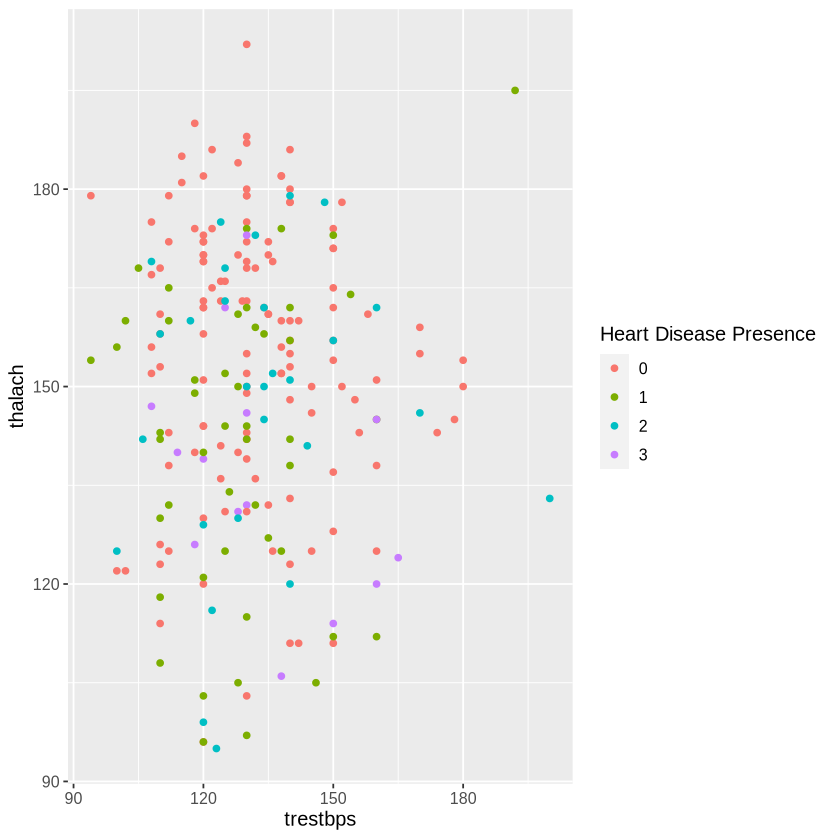

In [23]:
# some visualizations of the potential predictors
# all folowing plots need to add labels, change text font, size and change colors

trestbps_thalach <- cleveland_train_clean |>
  ggplot(aes(x = trestbps, y = thalach, color = heart_disease_presence)) +
  geom_point() +
  labs(color = "Heart Disease Presence") +
  theme(text = element_text(size = 12))
trestbps_thalach 

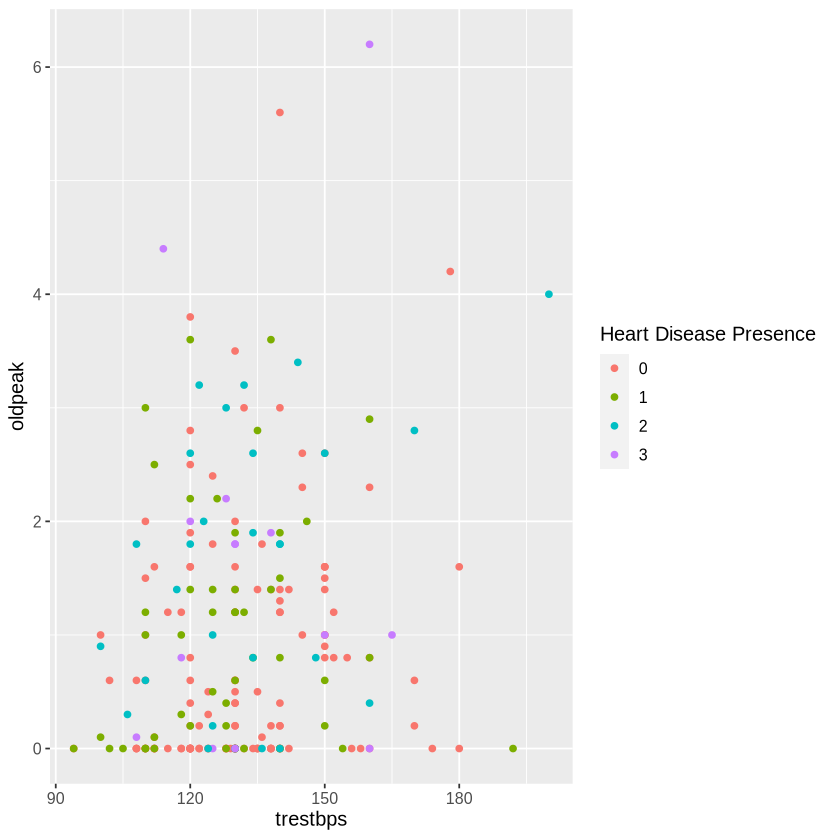

In [15]:
# some visualizations of the potential predictors

trestbps_oldpeak <- cleveland_train_clean |>
  ggplot(aes(x = trestbps, y = oldpeak, color = heart_disease_presence)) +
  geom_point() +
  labs(color = "Heart Disease Presence") +
  theme(text = element_text(size = 12))
trestbps_oldpeak

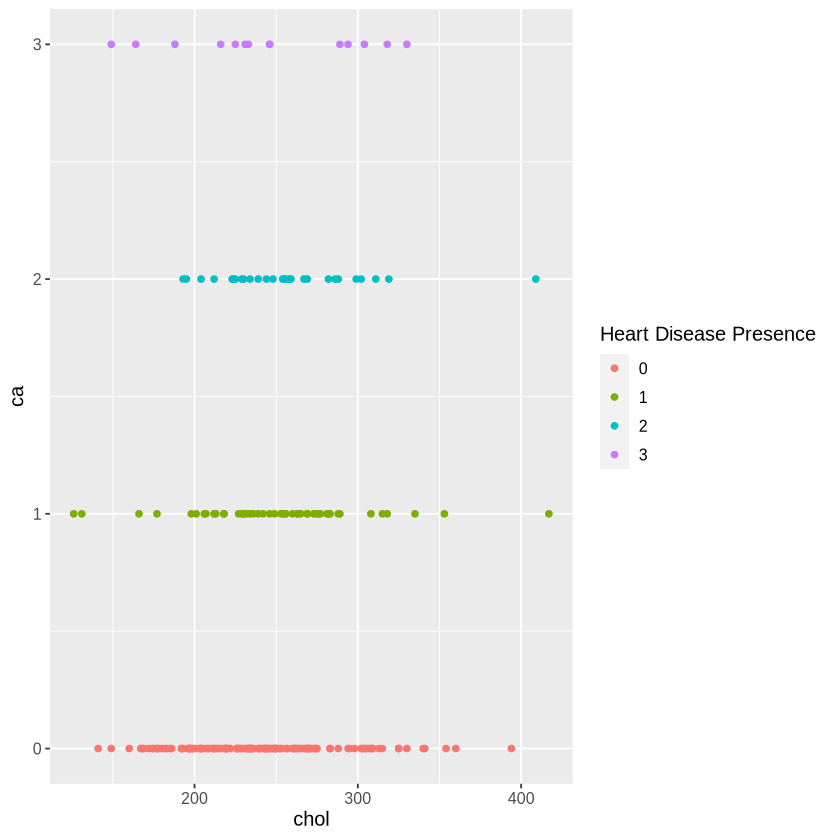

In [16]:
# some visualizations of the potential predictors
chol_ca <- cleveland_train_clean |>
  ggplot(aes(x = chol, y = ca, color = heart_disease_presence)) +
  geom_point() +
  labs(color = "Heart Disease Presence") +
  theme(text = element_text(size = 12))
chol_ca

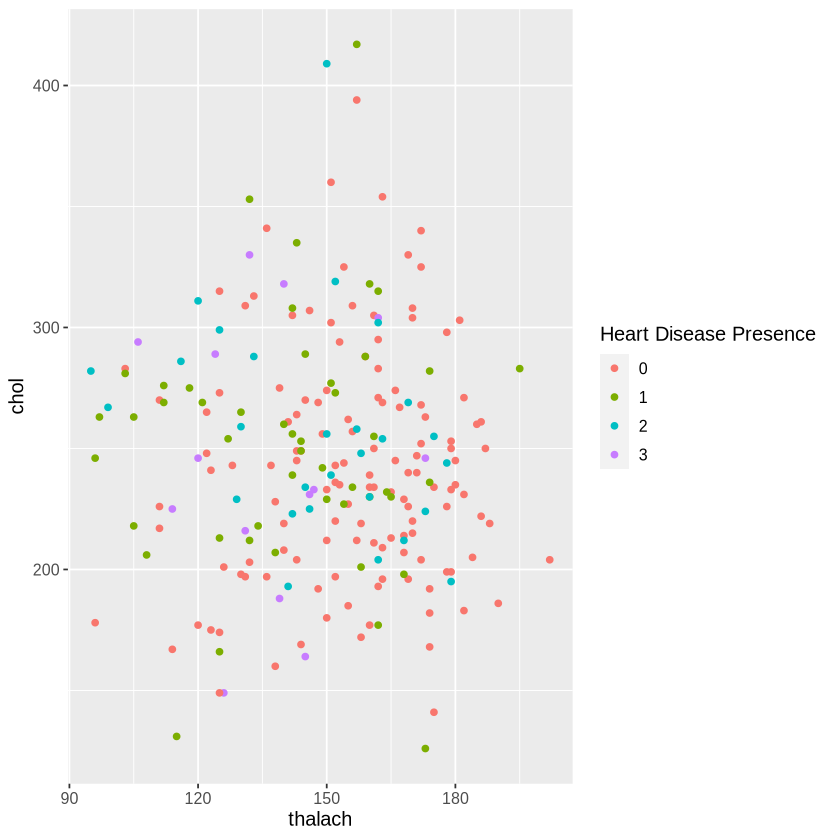

In [17]:
# some visualizations of the potential predictors
thalach_chol <- cleveland_train_clean |>
  ggplot(aes(x = thalach, y = chol, color = heart_disease_presence)) +
  geom_point() +
  labs(color = "Heart Disease Presence") +
  theme(text = element_text(size = 12))
thalach_chol

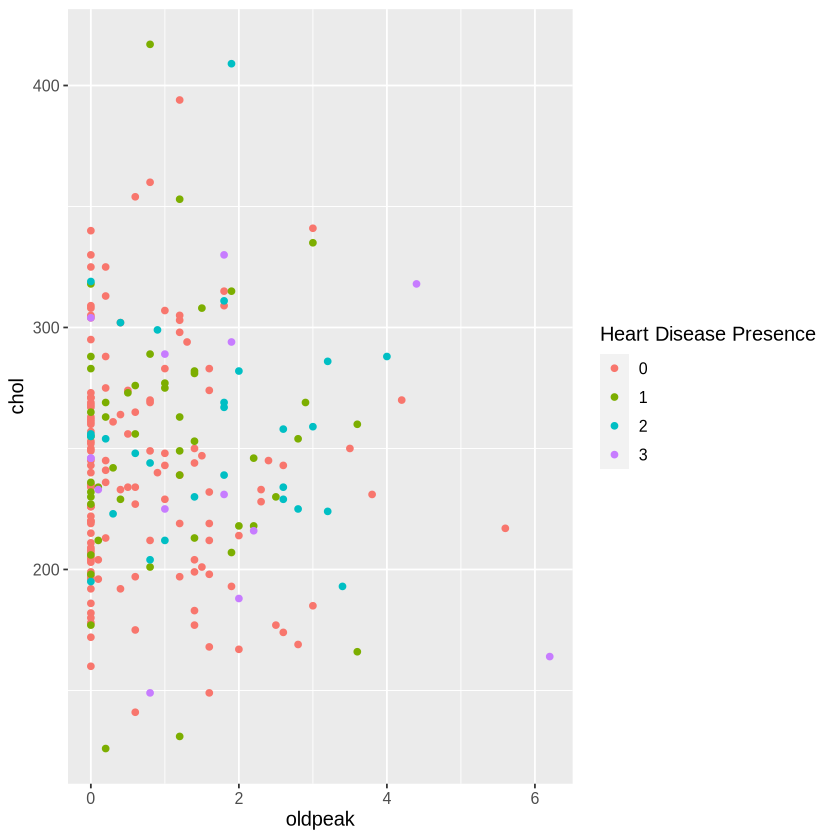

In [18]:
# some visualizations of the potential predictors
oldpeak_chol <- cleveland_train_clean |>
  ggplot(aes(x = oldpeak, y = chol, color = heart_disease_presence)) +
  geom_point() +
  labs(color = "Heart Disease Presence") +
  theme(text = element_text(size = 12))
oldpeak_chol

## Methods:
I'll get back to this in 30 seconds


## Expected Outcomes and Significance:

Elevated serum cholesterol heightens the risk of arterial plaque buildup, impeding blood flow and increasing the risk of clot formation. Elevated blood pressure impairs vessel elasticity, diminishing blood flow and augmenting heart disease susceptibility, manifesting as chest pain. Consequently, we anticipate finding relationships/ correlations between our 5 predictor variables and the presence or absence of heart disease. It is likely that factors like high serum cholesterol levels, resting blood pressure, and maximum heart rate achieved during exercise correlate positively with heart disease. This study harbours the potential for a cost-effective heart disease classification alternative. Furthermore, mitigating factors contributing to elevated serum cholesterol and blood pressure can enhance preventive measures against heart disease. Future inquiries could explore the interplay of various factors in heart disease diagnosis. For instance, “Are there specific age ranges where certain predictor variables exhibit a stronger association with the presence of heart disease?” and “Is there a sex difference where certain predictor variables exhibit a stronger association with the presence of heart disease?”


